In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

### Data Preparation

* The dataset has been taken from [World Happiness Report- 2024]( https://www.kaggle.com/datasets/jainaru/world-happiness-report-2024-yearly-updated?select=World-happiness-report-updated_2024.cs) 

In [164]:
df = pd.read_csv("World-happiness-report-2024.csv")
df.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [165]:
df.isna().sum()

Country name                    0
Regional indicator              0
Ladder score                    0
upperwhisker                    0
lowerwhisker                    0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64

In [166]:
df = df.dropna()
df.isna().sum()

Country name                    0
Regional indicator              0
Ladder score                    0
upperwhisker                    0
lowerwhisker                    0
Log GDP per capita              0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Dystopia + residual             0
dtype: int64

In [167]:
df = df.drop(["upperwhisker", "lowerwhisker", "Dystopia + residual"], axis=1)
df = df.rename(columns={"Country name":"Country", "Ladder score":"Happiness score", "Regional indicator":"Region"})
df.head()

,Country,Region,Happiness score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.741,1.844,1.572,0.695,0.859,0.142,0.546
1,Denmark,Western Europe,7.583,1.908,1.520,0.699,0.823,0.204,0.548
2,Iceland,Western Europe,7.525,1.881,1.617,0.718,0.819,0.258,0.182
3,Sweden,Western Europe,7.344,1.878,1.501,0.724,0.838,0.221,0.524
4,Israel,Middle East and North Africa,7.341,1.803,1.513,0.740,0.641,0.153,0.193


### Exploratory Data Analysis:

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 0 to 142
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       140 non-null    object 
 1   Region                        140 non-null    object 
 2   Happiness score               140 non-null    float64
 3   Log GDP per capita            140 non-null    float64
 4   Social support                140 non-null    float64
 5   Healthy life expectancy       140 non-null    float64
 6   Freedom to make life choices  140 non-null    float64
 7   Generosity                    140 non-null    float64
 8   Perceptions of corruption     140 non-null    float64
dtypes: float64(7), object(2)
memory usage: 10.9+ KB


In [169]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness score,140.0,5.530893,1.181247,1.721,4.63175,5.8005,6.42625,7.741
Log GDP per capita,140.0,1.378807,0.425098,0.000,1.07775,1.4315,1.74150,2.141
Social support,140.0,1.134329,0.333317,0.000,0.92175,1.2375,1.38325,1.617
Healthy life expectancy,140.0,0.520886,0.164923,0.000,0.39800,0.5495,0.64850,0.857
Freedom to make life choices,140.0,0.620621,0.162492,0.000,0.52750,0.6410,0.73600,0.863
Generosity,140.0,0.146271,0.073441,0.000,0.09100,0.1365,0.19250,0.401
Perceptions of corruption,140.0,0.154121,0.126238,0.000,0.06875,0.1205,0.19375,0.575


array([[<Axes: title={'center': 'Happiness score'}>,
        <Axes: title={'center': 'Log GDP per capita'}>,
        <Axes: title={'center': 'Social support'}>],
       [<Axes: title={'center': 'Healthy life expectancy'}>,
        <Axes: title={'center': 'Freedom to make life choices'}>,
        <Axes: title={'center': 'Generosity'}>],
       [<Axes: title={'center': 'Perceptions of corruption'}>, <Axes: >,
        <Axes: >]], dtype=object)

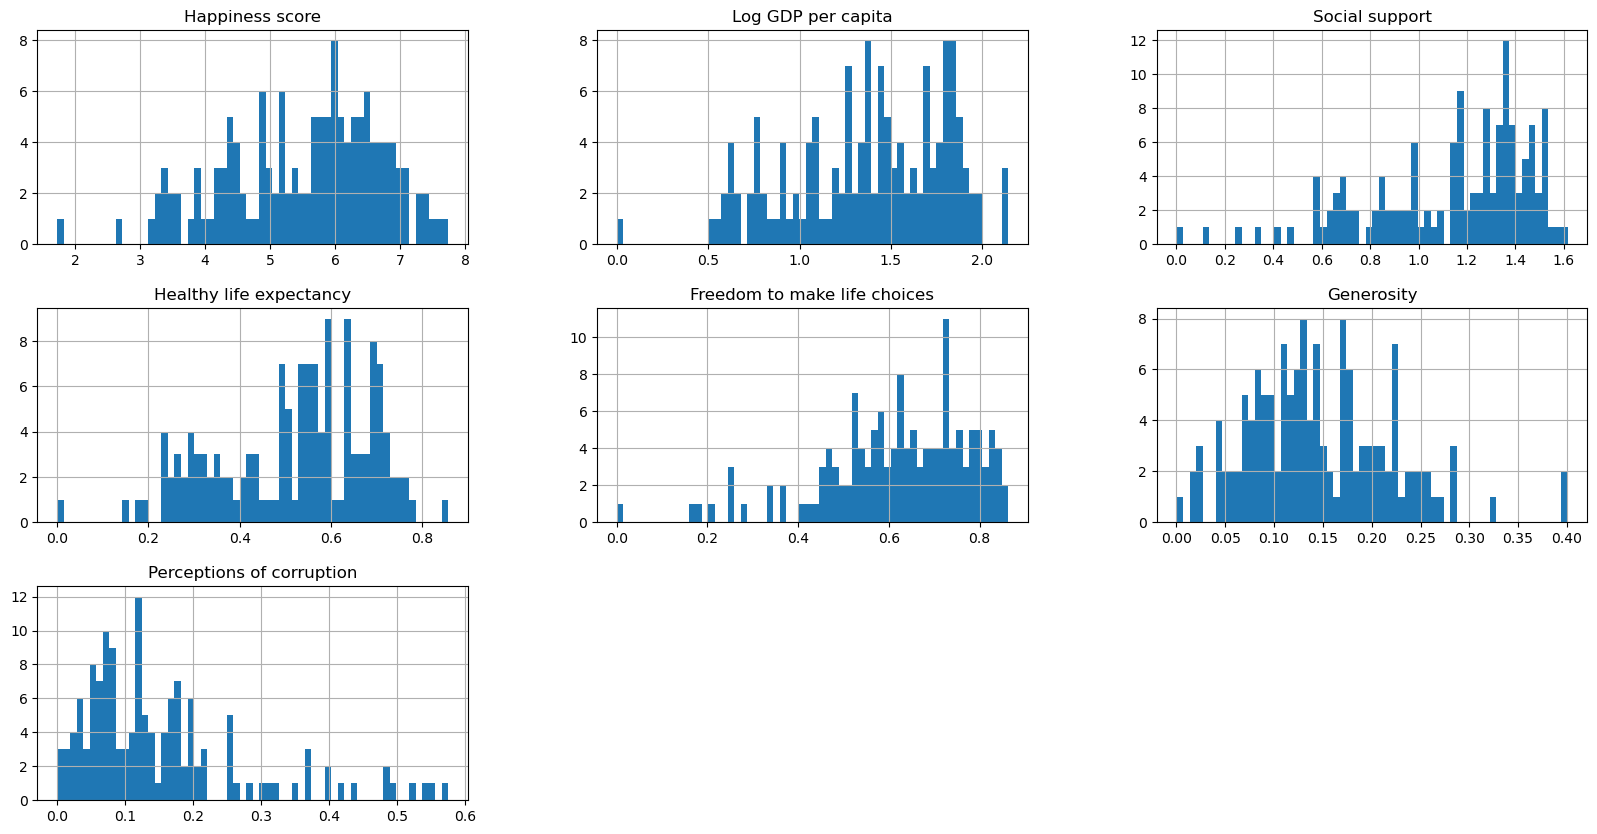

In [170]:
df.hist(figsize = (20,10), bins=60)

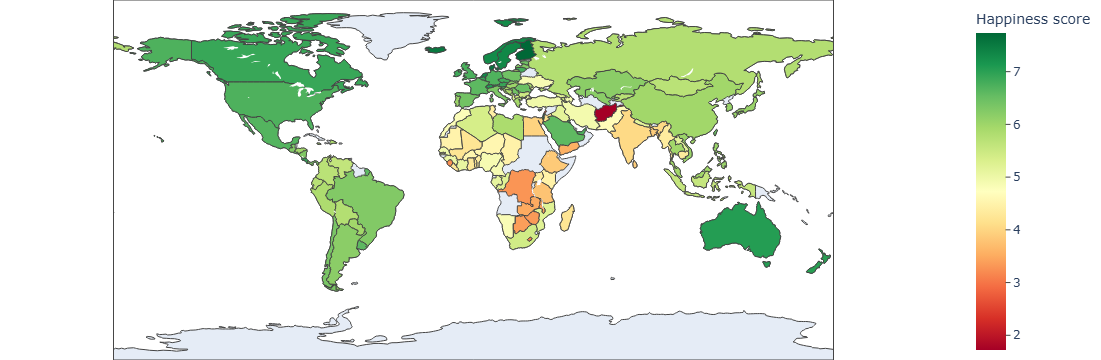

In [171]:
df['Country'] = df['Country'].replace({'Turkiye': 'Turkey'})

fig = px.choropleth(df, locations='Country', locationmode='country names',scope='world',
                    color='Happiness score', color_continuous_scale= 'RdYlGn')
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0},
                  coloraxis_colorbar=dict(title = 'Happiness score',
                                          ticks = 'outside',
                                          tickvals = list(range(1,9))))
fig.show()

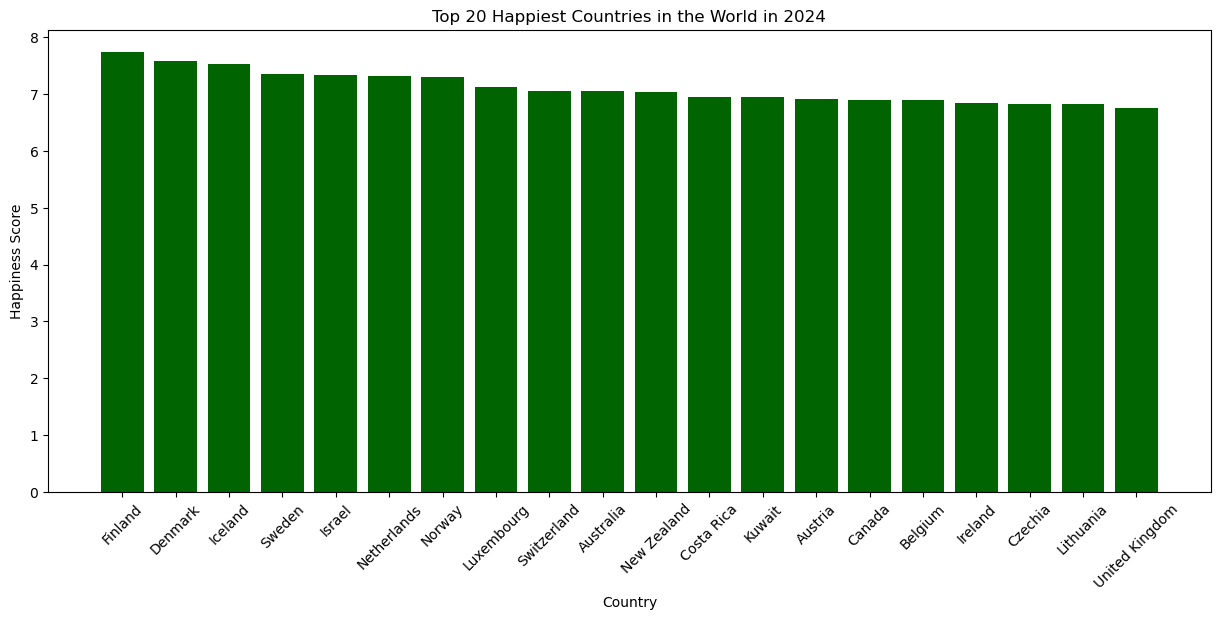

In [172]:
top10 = df.sort_values("Happiness score", ascending=False).head(20)

plt.figure(figsize=(15, 6))
plt.bar(top10["Country"], top10["Happiness score"], color="darkgreen")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.ylabel("Happiness Score")
plt.title("Top 20 Happiest Countries in the World in 2024")
plt.show()

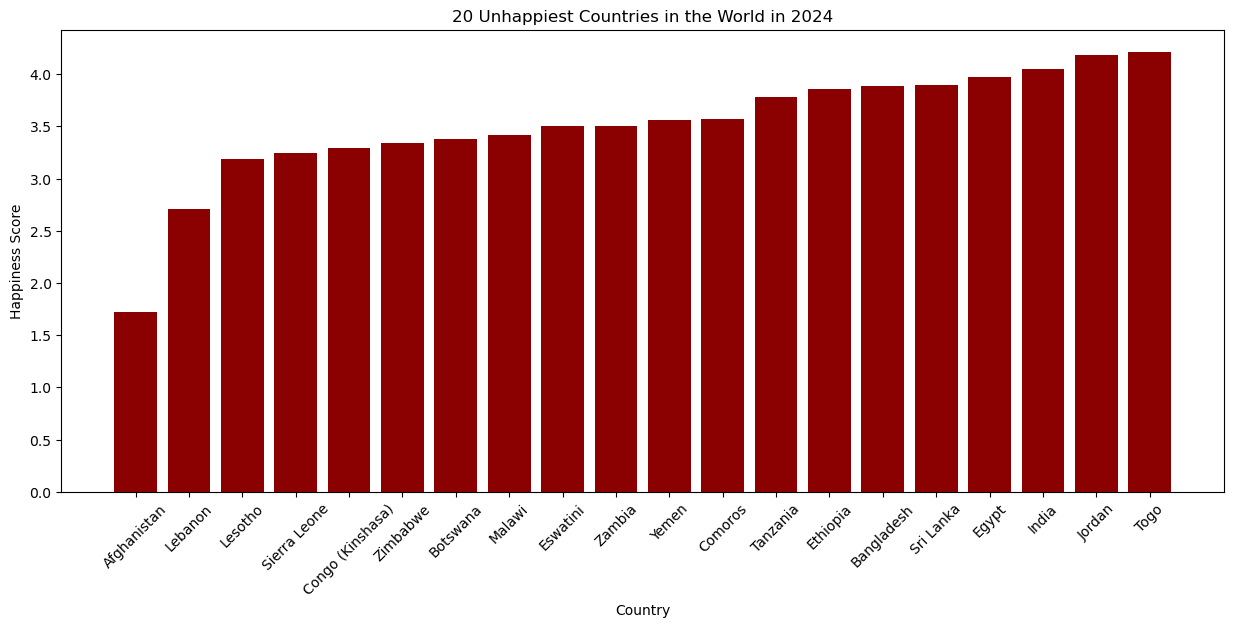

In [173]:
least10 = df.sort_values("Happiness score", ascending=True).head(20)

plt.figure(figsize=(15, 6))
plt.bar(least10["Country"], least10["Happiness score"], color="darkred")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.ylabel("Happiness Score")
plt.title("20 Unhappiest Countries in the World in 2024")
plt.show()

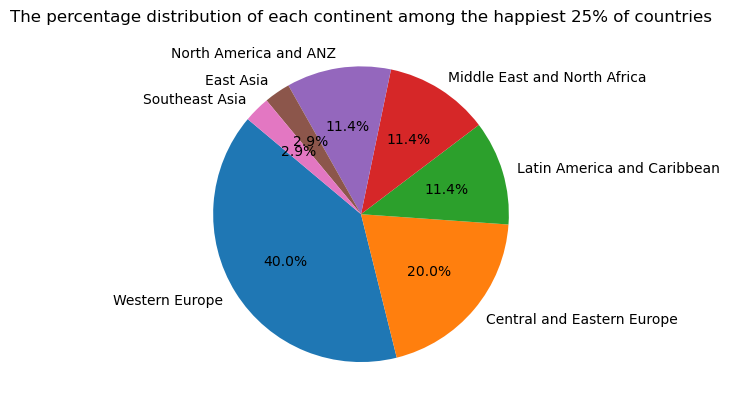

In [174]:
threshold = df['Happiness score'].quantile(0.75)
top_25_percent = df[df['Happiness score'] >= threshold]
top_25_percent_dist = top_25_percent.value_counts("Region")
plt.pie(top_25_percent_dist, labels=top_25_percent_dist.index, autopct='%1.1f%%', startangle=140)
plt.title("The percentage distribution of each continent among the happiest 25% of countries")
plt.show()

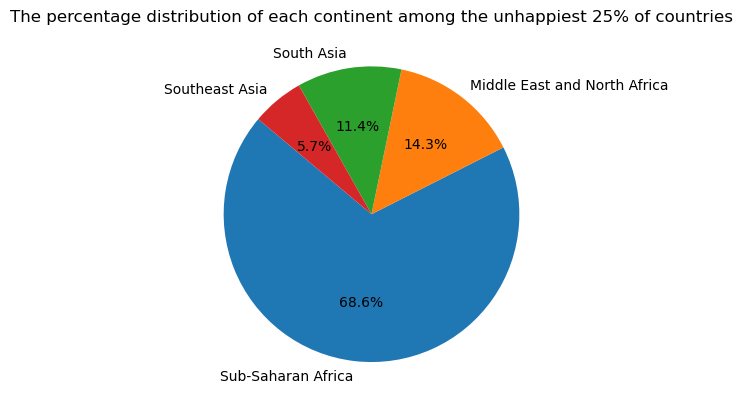

In [175]:
threshold2 = df['Happiness score'].quantile(0.25)
bottom_25_percent = df[df['Happiness score'] <= threshold2]
bottom_25_percent_dist = bottom_25_percent.value_counts("Region")
plt.pie(bottom_25_percent_dist, labels=bottom_25_percent_dist.index, autopct='%1.1f%%', startangle=140)
plt.title("The percentage distribution of each continent among the unhappiest 25% of countries")
plt.show()

<Axes: >

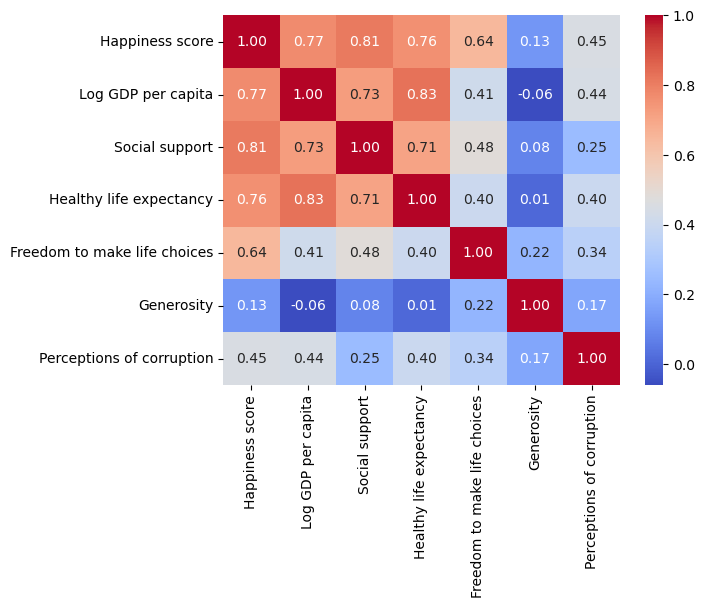

In [177]:
num_cols = df.select_dtypes(include='number')
corr = num_cols.corr()
sns.heatmap(corr, annot = True, fmt ='.2f', cmap="coolwarm")

### Linear Regression from scratch

In [178]:
class LinearRegression_scratch:
    def __init__(self, learning_rate = 0.001, epochs = 1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        costs = []

        for epoch in range(self.epochs):
            y_predict = np.dot(X, self.weights) + self.bias
    
            dw = (1 / n_samples) * np.dot(X.T, (y_predict - y))
            db = (1 / n_samples) * np.sum(y_predict - y)
    
            self.weights = self.weights - self.learning_rate * dw
            self.bias = self.bias - self.learning_rate * db

            cost = self.cost(y, y_predict)
            costs.append(cost)

        return costs[-1]

    def predict(self, X):
        y_predict = np.dot(X, self.weights) + self.bias
        return y_predict

    def cost(self, y_test, y_predict):
        return np.mean((y_predict - y_test)**2)

In [179]:
X = num_cols.drop(["Happiness score"], axis=1)
y = num_cols["Happiness score"]

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_standardized = (X - X_mean) / X_std

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size = 0.2, random_state = 1234)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 6)
(28, 6)
(112,)
(28,)


In [181]:
learning_rates = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75]
final_costs = []

for lr in learning_rates:
    linreg = LinearRegression_scratch(learning_rate=lr)
    linreg.fit(X_train, y_train)
    y_predict = linreg.predict(X_test)
    final_cost = linreg.cost(y_test, y_predict)
    print(f"Learning Rate: {lr}, Final Cost: {final_cost}")
    final_costs.append(final_cost)

optimal_lr_index = np.argmin(final_costs)
optimal_lr = learning_rates[optimal_lr_index]
print("\nOptimal Cost:", final_costs[optimal_lr_index])

Learning Rate: 0.0001, Final Cost: 25.88666672382906
Learning Rate: 0.001, Final Cost: 5.144616178773779
Learning Rate: 0.01, Final Cost: 0.27829298188229284
Learning Rate: 0.05, Final Cost: 0.27711095644143297
Learning Rate: 0.1, Final Cost: 0.27713682250569205
Learning Rate: 0.5, Final Cost: 0.27713690878274705
Learning Rate: 0.55, Final Cost: 0.27713690878274694
Learning Rate: 0.6, Final Cost: 0.2771369087827471
Learning Rate: 0.65, Final Cost: 8.954024429354075e+25
Learning Rate: 0.7, Final Cost: 3.598005907419749e+148
Learning Rate: 0.75, Final Cost: 9.450463941647596e+255

Optimal Cost: 0.27711095644143297


### Linear Regression with scikit-learn

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [186]:
learning_rates = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75]
epochs = 1000
costs = []

for lr in learning_rates:
    skl_model = SGDRegressor(learning_rate='constant', eta0=lr, max_iter = epochs, random_state = 42)
    skl_model.fit(X_train_scaled, y_train)
    y_pred = skl_model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Learning Rate: {lr}, Cost: {mse}")
    costs.append(mse)
    
optimal_lr_index = np.argmin(costs)
optimal_lr = learning_rates[optimal_lr_index]
print("\nOptimal Cost:", costs[optimal_lr_index])

Learning Rate: 0.0001, Cost: 0.43094918376013097
Learning Rate: 0.001, Cost: 0.29287575388888903
Learning Rate: 0.01, Cost: 0.31552876633246874
Learning Rate: 0.05, Cost: 0.40917400163682194
Learning Rate: 0.1, Cost: 0.24071364888004285
Learning Rate: 0.5, Cost: 1.7947260071482756e+24
Learning Rate: 0.55, Cost: 1.275944306929943e+25
Learning Rate: 0.6, Cost: 6.231472190869038e+24
Learning Rate: 0.65, Cost: 3.3964109681748034e+24
Learning Rate: 0.7, Cost: 9.510130010371486e+23
Learning Rate: 0.75, Cost: 4.029743774638634e+24

Optimal Cost: 0.24071364888004285
